# PIMA Indians Diabetes

# Disclaimers
## Authorship 

This notebook has been prepared by **Susan Li** and modified to cope with the purpose of this class. Main modifications were inclusion of extra documentation of the functions and chunks of code, inclusions of references to 3rd part resources. If you are interested on the original file, please have a look at:
https://towardsdatascience.com/machine-learning-for-diabetes-562dd7df4d42 all credits should be given to [**Susan Li**](https://towardsdatascience.com/@actsusanli) for her great work. 

## Liability

The material and information contained on this notebook is for general information and educational purposes only. You should not rely upon the material or information on the notebook as a basis for making any business, legal or any other decisions.

I am not be liable for any false, inaccurate, inappropriate or incomplete information presented on the notebook. Any reliance you place on such material is therefore strictly at your own risk.

## Datasets license

The **Deabetes Dataset** used in this notebook was obtained at Kaggle and originally published by [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/support/diabetes) no personal data that could be used to identify the subjects were included on the dataset.

Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

Sincerely,

**Adriano Barbosa**

## Background

**Diabetes**, is a group of metabolic disorders in which there are high blood sugar levels over a prolonged period.  Symptoms of high blood sugar include frequent urination, increased thirst, and increased hunger.  If left untreated, diabetes can cause many complications.  Acute complications can include diabetic ketoacidosis, hyperosmolar hyperglycemic state, or death.  Serious long-term complications include cardiovascular disease, stroke, chronic kidney disease, foot ulcers, and damage to the eyes.

This **dataset** is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## Objective

Investigate whether we can confirm the connection between model complexity and accuracy using as example KNeighborsClassifier


## Data

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

* **Pregnancies**: Number of times pregnant
* **Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* **BloodPressure**: Diastolic blood pressure (mm Hg)
* **SkinThickness**: Triceps skin fold thickness (mm)
* **Insulin**: 2-Hour serum insulin (mu U/ml)
* **BMI**: Body mass index (weight in kg/(height in m)^2)
* **DiabetesPedigreeFunction**: Diabetes pedigree function
* **Age**: Age (years)
* **Outcome**: Class variable (0 or 1)




In [1]:
#Required before starting the next chunks, this takes a little while until the packages are installed.
#!pip install -U numpy
#!pip install -U pandas
#!pip install -U matplotlib
#!pip install -U sklearn
#!pip install -U seaborn
#!pip install -U plotly
#!pip install -U chart_studio

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import tools

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

#import plotly.plotly as py
from chart_studio import plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
from IPython.display import HTML, Image

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [3]:
#Import the4 dataset
df = pd.read_csv('./diabetes.csv')

In [4]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Splitting the dataset

In [5]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

/Users/adriano.barbosa/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



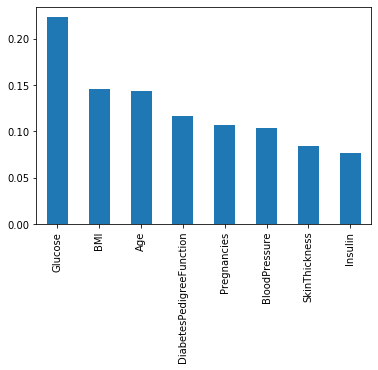

In [18]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X, y)

(pd.Series(model.feature_importances_, index=X.columns)
   .nlargest(8)
   .plot(kind='bar')) 


## Iterating the number of neighbors
**Reference**:<br>
https://towardsdatascience.com/machine-learning-for-diabetes-562dd7df4d42

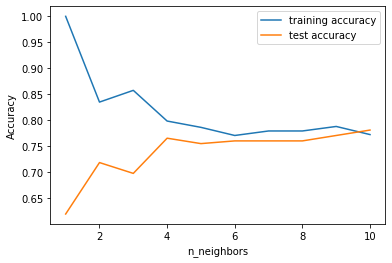

In [22]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []

# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [23]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.79
Accuracy of K-NN classifier on test set: 0.77
